# Julia + Power8 + GPUs = Art
This notebook presents an algorithm for neural style [1]. Our network extracts features from a particular style image and then "applies" those features on a content image. 

[1] Gatys, Leon A., Alexander S. Ecker, and Matthias Bethge. "A neural algorithm of artistic style." arXiv preprint arXiv:1508.06576 (2015).

In [1]:
using MXNet
using Images
using Interact

In [2]:
include("train2.jl");

## Input Style Images

Let us look at our available styles. You can your custom style from any other folder too. 

Interact.Options{:ToggleButtons,Any}(Signal{Any}(starry_night, nactions=0),"style","starry_night","starry_night",Interact.OptionDict(Any["starry_night","lily","leaf","grass","bark","sunday"],Dict{Any,Any}(Pair{Any,Any}("grass","grass"),Pair{Any,Any}("bark","bark"),Pair{Any,Any}("starry_night","starry_night"),Pair{Any,Any}("sunday","sunday"),Pair{Any,Any}("lily","lily"),Pair{Any,Any}("leaf","leaf"))),Any[],Any[])

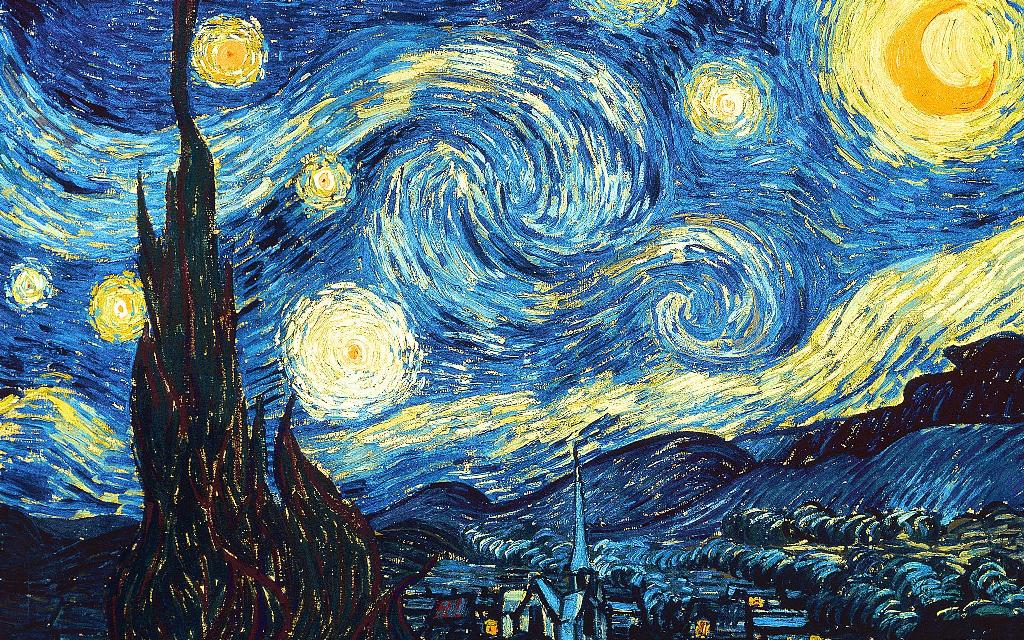

In [3]:
style_image = @manipulate for style in ["starry_night", "lily", "leaf", "grass", "bark", "sunday", ]
    load("styles/$style.jpg")
end

## Input Content Images

Let us take a look at our input images.

Interact.Options{:ToggleButtons,Any}(Signal{Any}(1, nactions=0),"image","1","1",Interact.OptionDict(Any["1","2","3","4","5","6","7","8","9","10"],Dict{Any,Any}(Pair{Any,Any}("8","8"),Pair{Any,Any}("4","4"),Pair{Any,Any}("1","1"),Pair{Any,Any}("5","5"),Pair{Any,Any}("2","2"),Pair{Any,Any}("6","6"),Pair{Any,Any}("7","7"),Pair{Any,Any}("10","10"),Pair{Any,Any}("9","9"),Pair{Any,Any}("3","3"))),Any[],Any[])

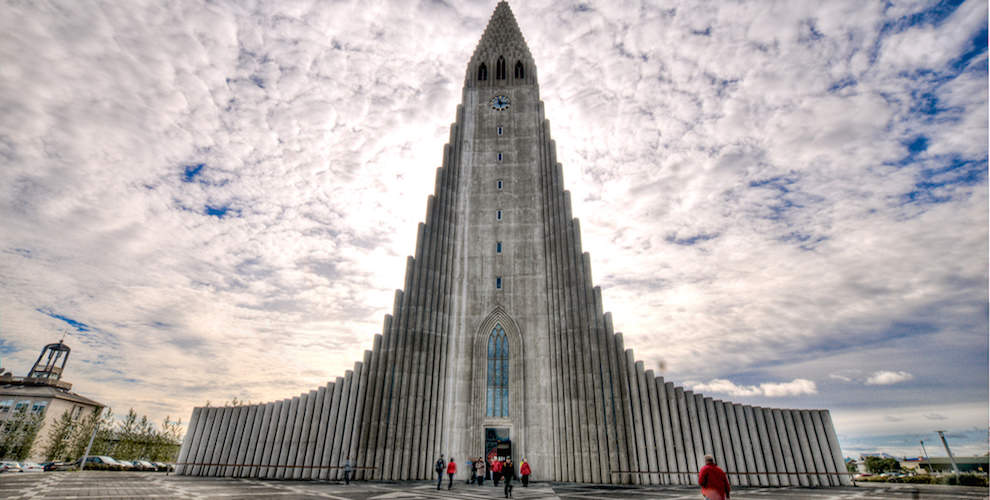

In [4]:

input_image = @manipulate for image in [string(i) for i in 1:10]
    load("input/$image.jpg")
end


## Training
Let us now train our network to learn features from our style images and apply them on our content images. Run the `train` function with the following two arguments. 

load the content image, size = (270,387)
resize the content image to (270,387)
Progress:   5%  ETA: 0:00:21
  relative_change:  0.32005095updating learning rate to 0.09000000000000001
Progress:  11%  ETA: 0:00:18
Progress:  17%  ETA: 0:00:16
  relative_change:  0.10150186updating learning rate to 0.08100000000000002
Progress:  23%  ETA: 0:00:15
Progress:  29%  ETA: 0:00:14
  relative_change:  0.071461506updating learning rate to 0.0729
Progress:  35%  ETA: 0:00:12
  relative_change:  0.060085922updating learning rate to 0.06561000000000002
Progress:  41%  ETA: 0:00:11
Progress:  47%  ETA: 0:00:10
  relative_change:  0.04288261save output to output/tmp_50.jpg
dimensions are (387,270,3,1)
updating learning rate to 0.05904900000000001
Progress:  53%  ETA: 0:00:09
Progress:  59%  ETA: 0:00:08
  relative_change:  0.025563253updating learning rate to 0.05314410000000001
Progress:  65%  ETA: 0:00:07
  relative_change:  0.021799466updating learning rate to 0.04782969000000001
Progress:  71%  E

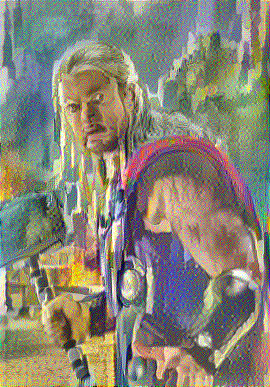

In [8]:
@time train(value(input_image), value(style_image), max_num_epochs=100)

### Training Performance Comparison between CPU and GPU

Here we can see the difference in performance between the CPU and GPU. These experiments have been conducted while training on the Taj Mahal content image (input/9.jpg) and Leaf style (style/leaf.jpg)

![performance](perf.png)